### Preface:
A lot of apps in China claims that by using automatic investment plan, which is an investment program that allows investors to contribute money to an investment account at regular intervals to be invested in a pre-set strategy or portfolio, investors can have a higher chance of winning, which is making a profit, than a lump-sum buy. For example, buying $100 of QQQ every week is a kind of automatic investment plan. These apps recommend 'newbie' investors to adopt this plan to have a higher rate of making a gain.

I want to test if automatic investment plan really beats lump-sum buy. 'Beats' can have a lot of meanings: it could be a higher return, a smaller volatility, or a higher sharpe ratio.

In [2]:
import pandas as pd
import pandas_datareader as pdr
# the first step is to download the data from yahoo using pandas datareader
# the nasdaq_etf.csv which contains info of all etf traded on nasdaq is downloaded directly from nasdaq website
data = pd.read_csv('nasdaq_etf.csv')
ticker = data['SYMBOL']
df = pd.DataFrame()
# we start the first column with 'QQQ' which is a nasdaq index etf
df['QQQ'] = pdr.get_data_yahoo('QQQ', start='1990-01-01')['Adj Close']
df.head()

,QQQ
Date,
1999-03-10,44.229828
1999-03-11,44.446377
1999-03-12,43.363640
1999-03-15,44.608795
1999-03-16,44.987747


In [4]:
# this is the loop to download the price data of all etf traded on Nasdaq and concatenate them into one dataframe
# since the data is too large, it may take a long time to run
for i in ticker:
    d = pdr.get_data_yahoo(i, start='1990-01-01')
    df[i] = d['Adj Close']

C:\Users\chenw\AppData\Local\Temp/ipykernel_19480/1427067231.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i] = d['Adj Close']


In [5]:
newframe = df.copy()

In [6]:
# it show that there are 2697 etfs in total with price data of 5768 trading days
newframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5768 entries, 1999-03-10 to 2022-02-07
Columns: 2697 entries, QQQ to PSCT
dtypes: float64(2697)
memory usage: 118.9 MB


In [7]:
# this concludes the data downloading process
newframe.to_csv('etf_price_data.csv')

In [1]:
# here begins the testing process
import pandas as pd
data = pd.read_csv('etf_price_data.csv')
data.head()

,Date,QQQ,DJUN,DLN,DLS,DMAR,DMAY,DMCY,DMDV,DMRE,...,PSC,PSCC,PSCD,PSCE,PSCF,PSCH,PSCI,PSCJ,PSCM,PSCT
0,1999-03-10,44.335434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999-03-11,44.552479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1999-03-12,43.467171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-03-15,44.715282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1999-03-16,45.095146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# since the data is too big and may take a long time to run the test, by the time I only test the QQQ
p = data['QQQ']

0        44.335434
1        44.552479
2        43.467171
3        44.715282
4        45.095146
           ...    
5763    365.519989
5764    368.489990
5765    353.549988
5766    358.010010
5767    355.130005
Name: QQQ, Length: 5768, dtype: float64

In [3]:
from random import randint

columns = ['lsr', 'air']
df = []
n = p.count()
for j in range(10000):
    t0 = randint(1, n-1)
    t1 = randint(t0+1, n)
    t = t1 - t0
    # the annualized return of lump-sum buy denoted lpr is
    lsr = (p[t1-1]/p[t0-1]-1)/t*250
    cost = 0
    for i in range(t0, t1):
        # the cost is the number of shares bought every day
        cost += 1/t/p[i-1]
    # the annualized return of automatic investment plan denoted air is
    air = (p[t1-1]*cost - 1)/t*250
    df.append([lsr, air])

df = pd.DataFrame(df, columns=columns)

mean = df.mean()
std = df.std()
# here we use a risk-free rate of 0.03 for simplicity
sharpe = (mean-0.03)/std
# this code cell can be run multiple times but will always get a positive sharpe ratio difference, which is the return of lump-
# sum buy over that of automatic investment plan. Thus, we can conclude that for the 'QQQ', lump-sum buy has better return per
# unit risk than automatic investment plan.
sharpe_diff = sharpe[0] - sharpe[1]
sharpe_diff
# this code cell can be run multiple times, the statistic could be different from that in the write-up, but the test result is
# basically the same

0.22260471993801106

In [8]:
df.loc[df['lsr']>0].count()/df.count()

lsr    0.8937
air    0.8937
dtype: float64

In [9]:
df.loc[df['air']>0].count()/df.count()

lsr    0.9157
air    0.9157
dtype: float64

In [17]:
# the sharpe ratio of each plan is
mean = df.mean()
std = df.std()
sharpe = (mean-0.03)/std
sharpe

lsr    0.543729
air    0.305563
dtype: float64

In [19]:
# this is the answer I get for now, there could be mistakes or bias, for example my thinking process could be wrong, or as you
# know the nasdaq has been trending upward since its exception, of course, lump-sum buy would provide a higher return.
# my next step would be testing every ticker, that is every security that is publicly traded on the market, to try to get a
# general idea.
df.describe()

,lsr,air
count,10000.000000,10000.000000
mean,0.227851,0.111440
std,0.363878,0.266523
min,-10.135962,-10.135962
25%,0.110308,0.068352
50%,0.233907,0.118661
75%,0.351111,0.169579
max,9.445682,9.445682


(array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
         0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
         0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
         2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 5.000e+00, 7.000e+00,
         3.000e+00, 6.000e+00, 1.200e+01, 1.000e+01, 2.300e+01, 1.800e+01,
         3.900e+01, 7.300e+01, 1.390e+02, 1.149e+03, 3.682e+03, 3.419e+03,
         1.041e+03, 2.060e+02, 8.100e+01, 3.400e+01, 9.000e+00, 4.000e+00,
         7.000e+00, 0.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
         3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
         0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000

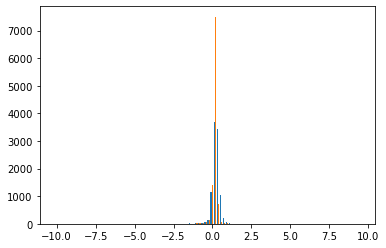

In [24]:
import matplotlib.pyplot as plt
plt.hist(df, bins=100)

In [18]:
# using t test to test if the means of the two plan are different
import scipy.stats as sst
sst.ttest_rel(df['lsr'], df['air'])

Ttest_relResult(statistic=67.87595403539177, pvalue=0.0)

In [25]:
fstat = (std[0]/std[1])**2
fstat

1.8639792071030483

In [26]:
sst.f.ppf(0.99, 9999, 9999)

1.0476321748962272

In [20]:
sst.pearsonr(df['lsr'], df['air'])

(0.8972159711365683, 0.0)

In [21]:
sst.spearmanr(df['lsr'], df['air'])

SpearmanrResult(correlation=0.8429147160888946, pvalue=0.0)

### Conclusion
Lump-sum buy return has a higher mean and a higher std than automatic investment plan. However, the percent of risk reduction by using automatic investment plan is much less than the percent of return reduction, in other words, the Sharpe ratio of the latter is lower.
It is a bad deal.

### possible flaws and bias
I only test the price data of QQQ, it may not be the case for other stocks or ETFs.
QQQ has been trending upward for the past 2 decades, it is natural sense that a lump-sum buy would provide a higher return, this might be the cause of higher Sharpe ratio.
